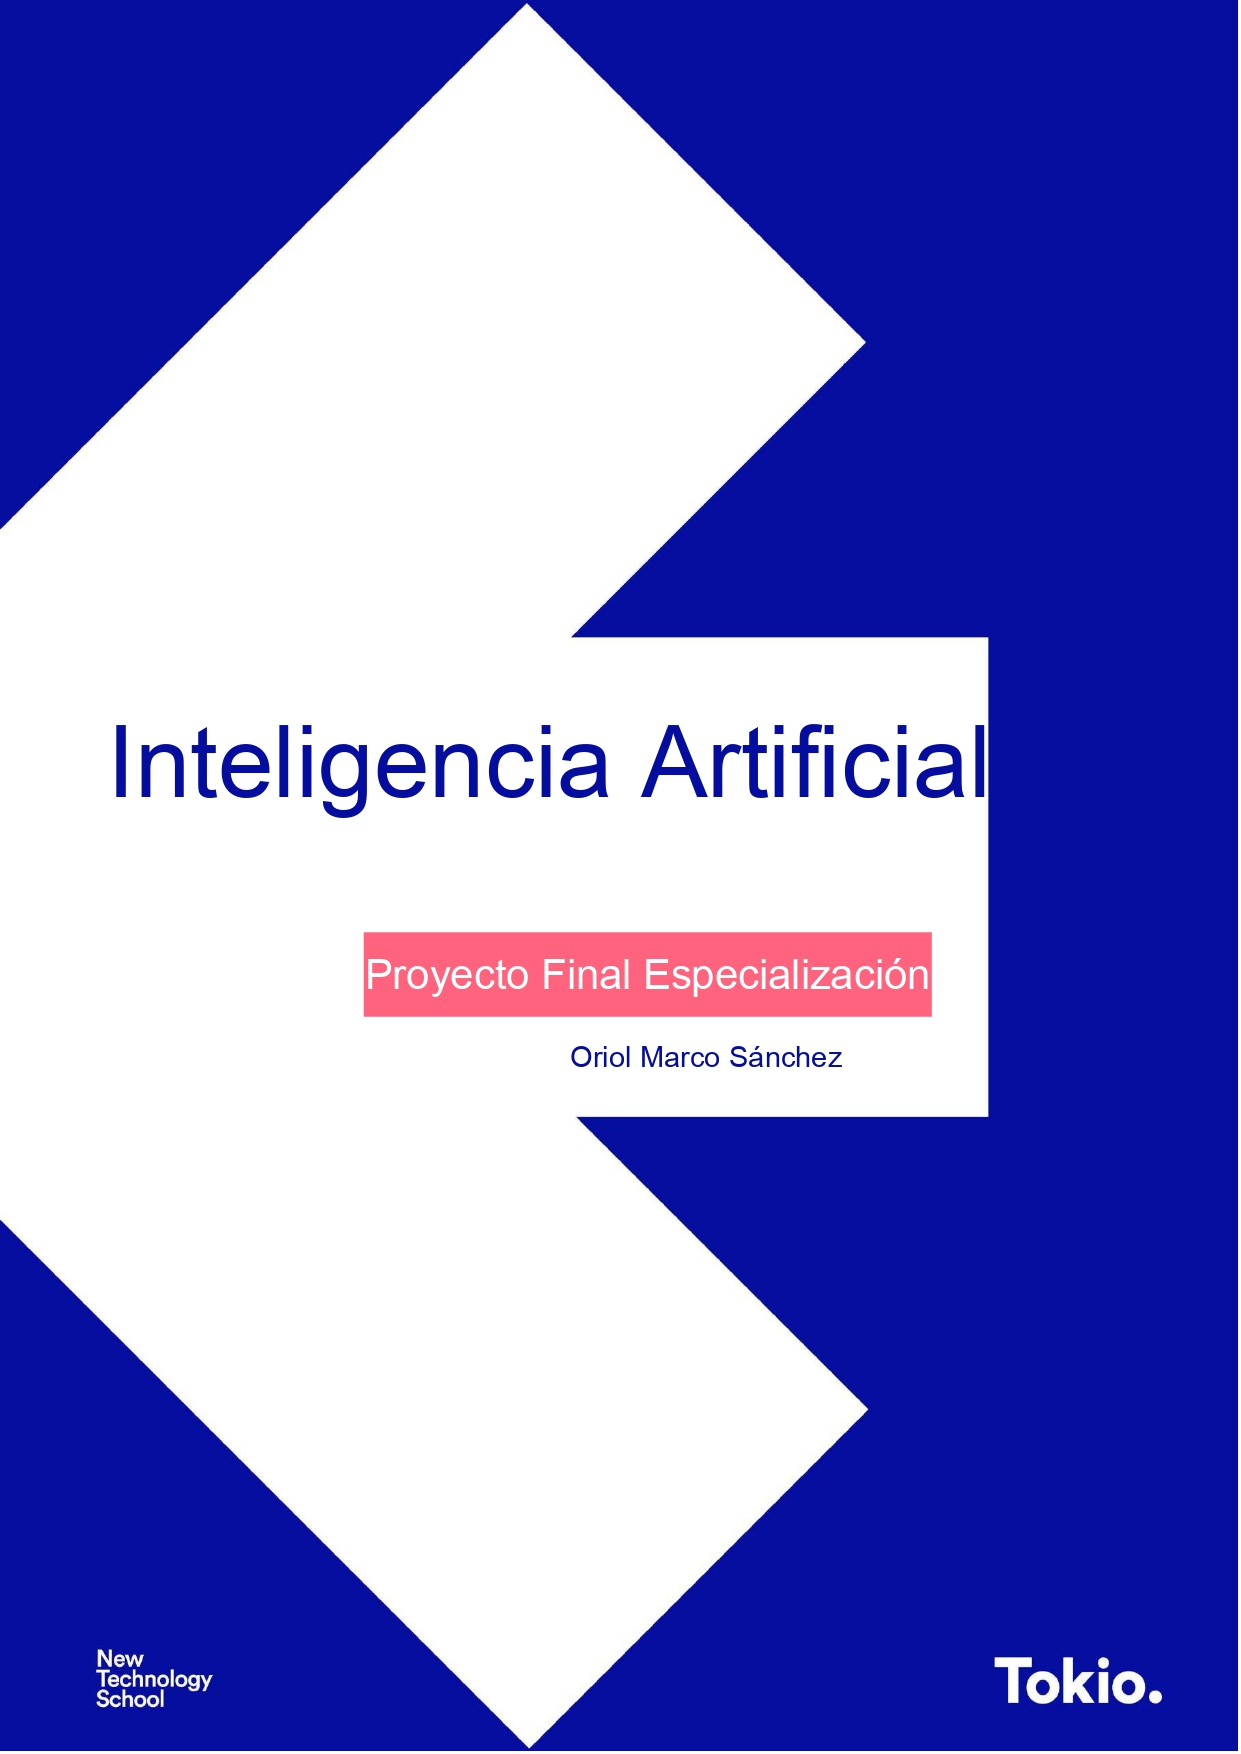

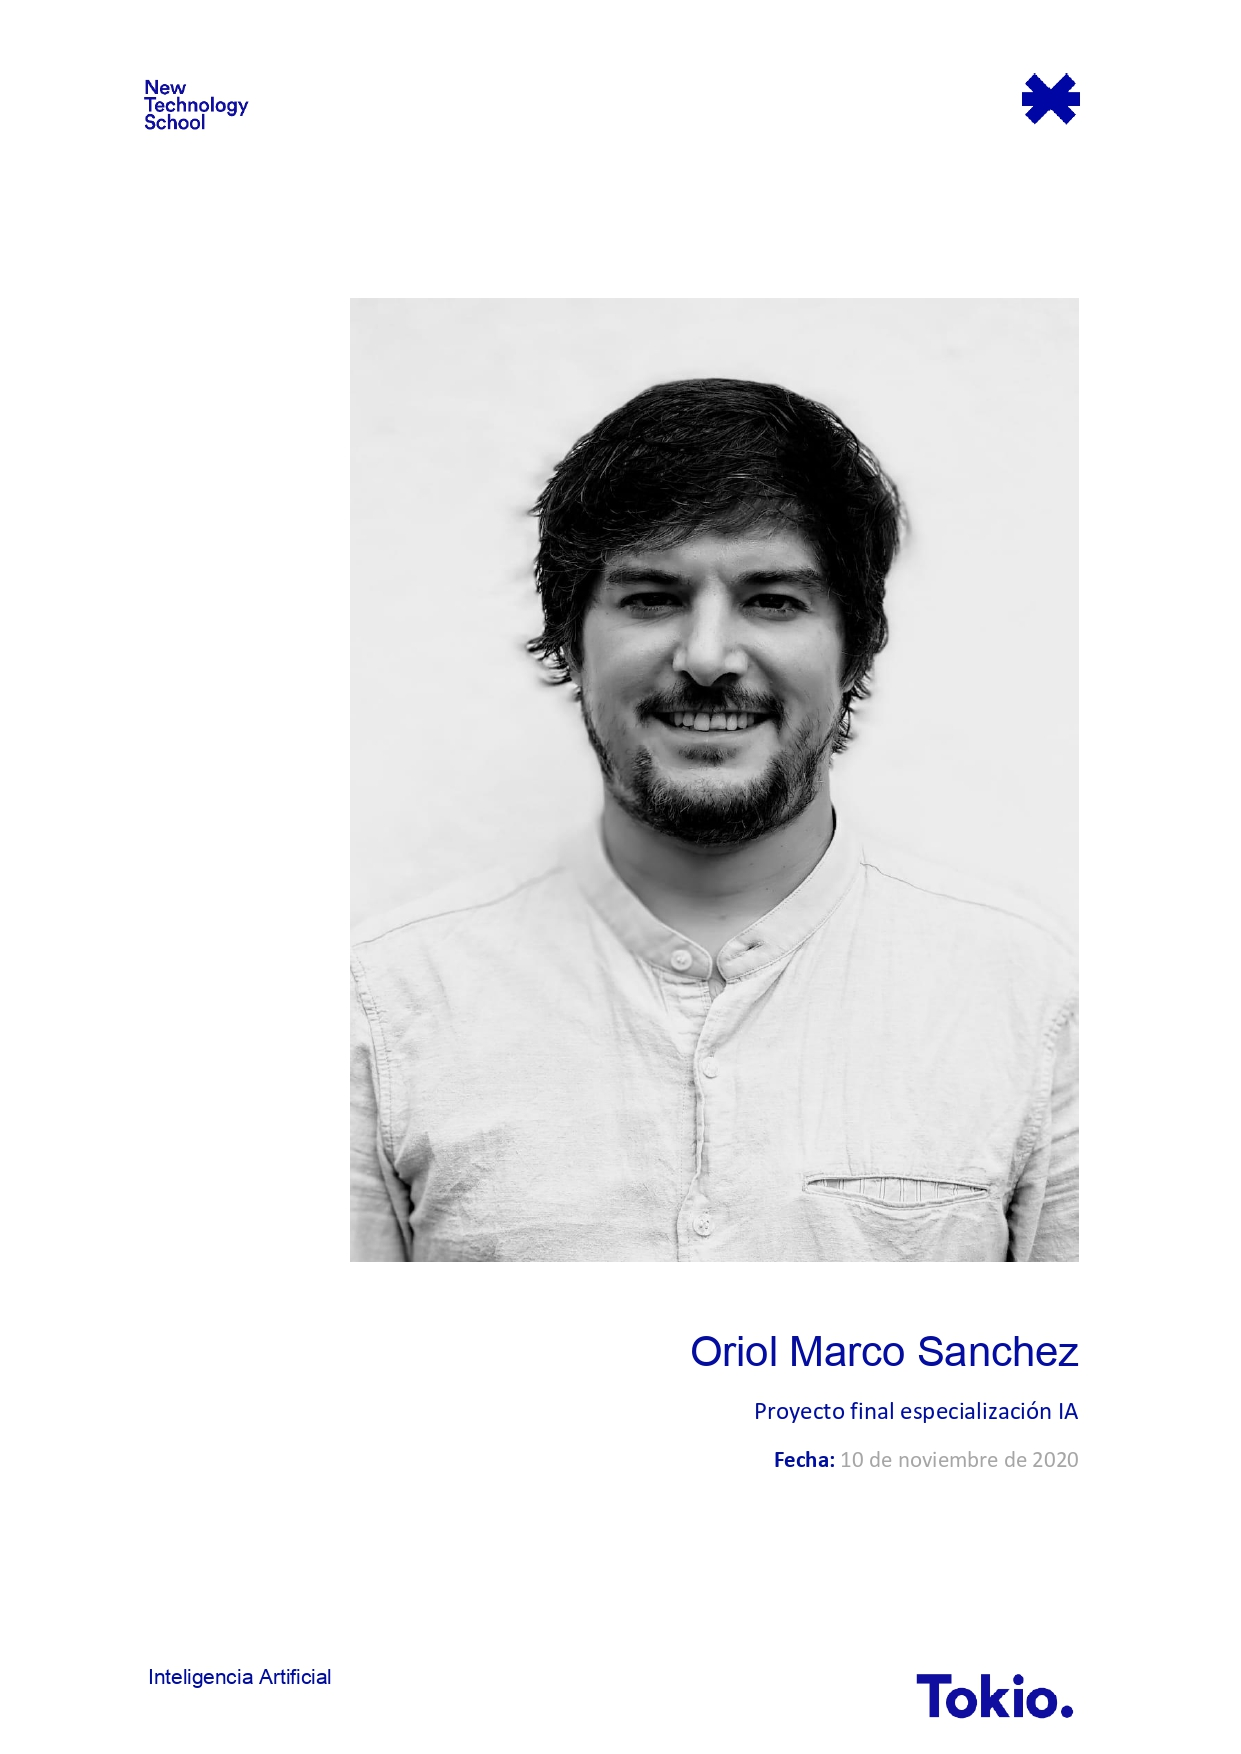

# Detección del cancer de mama mediante aprendizaje supervisado
***

### Definición y contexto

Se realiza un proyecto de detección del cancer mama mediante técnicas análiticas de aprendizaje supervisado, buscando la mayor precisión del algoritmo de detección y su clasificación.

El cáncer de mama es el tumor maligno más frecuente entre las mujeres de todo el mundo (a excepción de los tumores de cánceres de piel no melanomas).

En el año 2018 se diagnosticaron aproximadamente 2.088.849 casos nuevos de cáncer de mama en el mundo (teniendo en cuenta todos los sexos y todas las edades, excepto África oriental -datos Globocam 2018-). En la actualidad, es el tumor más frecuente en la población femenina y, aunque las tasas de cáncer de mama son más altas en países desarrollados, están aumentando en casi todas las regiones del mundo.

Según el Observatorio del Cáncer AECC, en España se diagnosticaron 33.307 nuevos casos en 2019; lo que representa algo más del 30% de todos los tumores del sexo femenino en nuestro país. El mayor número total de diagnósticos se encuentra en las mujeres en la franja de los 45-65 años. Este es uno de los motivos de que en estas edades se implementen la mayoría de programas de cribado. A pesar de ello, después de los 75 años, con el envejecimiento, aumenta el número de mujeres diagnosticadas.

Se estima que el cáncer de mama fue la causa de muerte de 626.679 personas en todo el mundo en 2018 (datos de Globocam); y la causa más frecuente de muerte por cáncer en 11 regiones del mundo.

Constituye, igualmente, la primera causa de muerte por cáncer entre las mujeres (154% del total de fallecimientos por cáncer en la población femenina). Si consideramos los dos sexos, solo es superado en mortalidad por los cánceres de pulmón, estómago, colorrectal e hígado.

Por lo comentado anteriormente es de máxima importancia poder ayudar a la detcción precoz del cancer de mama, con el objetivo de poder salvar millones de vidas.

### Dataset

Para llevar a cabo el proyecto se hace uso del dataset "Wisconsin Breast Cancer Dataset" El dataset se puede descaragr desde la siguiente url:

"https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29"

El conjunto de datos se compone de los siguientes datos:
- 569 pacientes.
- 30 características o features para cada caso de estudio.
- Etiqueta de cada uno de los estudios ( M=maligno / B=Benigno). Se trata de una clasificación binaria.

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

Información de los atributos o características:

1. **ID Number**: Número de identificación
2. **Diagnosis**: Diagnóstico (M = maligno, B = benigno)

Se calculan diez características de valor real para cada núcleo celular:

1. **Radius**: radio (media de las distancias desde el centro a los puntos del perímetro)
2. **Texture**: textura (desviación estándar de los valores de la escala de grises)
3. **Perimeter**: perímetro
4. **Area**: área
5. **Smoothness**: suavidad (variación local en las longitudes de los radios)
6. **Compactness**: compactabilidad (perímetro^2 / área - 1.0)
7. **Concavity**: concavidad (severidad de las porciones cóncavas del contorno)
8. **Concave points**: puntos cóncavos (número de porciones cóncavas del contorno)
9. **Symmetry**: simetría
10. **Fractal dimension**: dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o el valor más grande (la media de los tres
valores más grandes) de estas características se calcularon para cada imagen, lo que
resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo
13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

Valores faltantes: ninguno

Distribución de clases (etiquetas): 357 benignos, 212 malignos

### Carga y análisis de los datos

In [1]:
# Iportamos las librerías que utilizaré para realizar el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Carga del dataset y creación del DataFrame

df = pd.read_csv('cancer.csv')

In [3]:
# Mostramos las primeras 10 líneas del df

df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


El dataframe está organizado por el ID de la paciente, seguido de las características para cada uno de los análisis reaizados.

- La columna diagnosis hace referencia a si la masa que se ha analizado es maligna (M), o bien es benigna (B). Es la columna de la etiqueta.

In [4]:
# Realizamos el estudio de composición del dataframe.
#Éste se organiza en 569 paciantes, con 33 columnas o características, de las cuales 1 columna es el ID y otra es la etiqueta de estudio.

df.shape

(569, 33)

In [5]:
# Verificamos si alguno de los estudios contiene datos perdidos o faltantes (NaN).

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Podemos afirmar que ninguna de las columnas contiene datos faltantes. Disponemos de 569 estudios completos.

In [6]:
# Se elimina la columna con todos los datos faltantes y se almacena en el df modificado.

df = df.dropna(axis=1)

In [7]:
# Se realiza, de nuevo el conteo de de filas y columnas

df.shape

(569, 32)

Como se observa en el nuevo conteo, se ha eliminado una columna que no contenía valores.

In [8]:
# Se realiza un conteo de la cantidad de estudios donde se detecta que el cancer es maligno (M), o bien es benigno (B)

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Disponemos de:

- 357 pacientes con tumor benigno
- 212 pacientes con cancer maligno

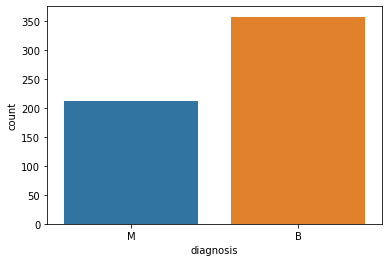

In [12]:
# Visualización de los datos de las etiquetas

sns.countplot(df['diagnosis'], label='count')

In [13]:
# Verificamos el tipo de datos que disponemos en cada una de las columnas y comprobamos que datos debemos transformar para realizar el estudio

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observamos que todas las categorías son numéricas (float64), excepto:

1- Id: se trata de un número entero que solo nos da información de identificación del paciente. Podemos prescindir de dicha columna.

2- Diagnosis: se trata de un objeto, nuestra etiqueta categórica para el estudio.

In [15]:
# Transformamos la columna categórica diagnosis para realizar el estudio y disponer de los datos de forma binaria.

from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

Obtenemos la matriz con todos los valores de la columan diagnosis transformados a valores binarios:

- 1 = Maligno (M)
- 0 = Benigno (B)

In [16]:
# Comprobamos la confiuración actual del DataFrame

df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


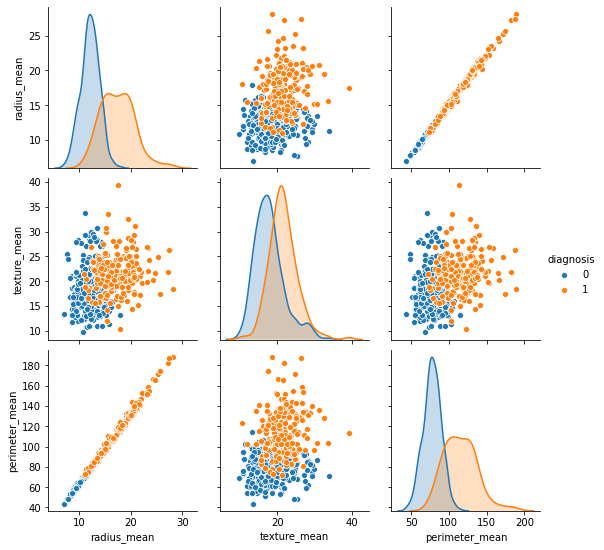

In [19]:
# Se procede a la creación de un pairplot de la librería de Seaborn

sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

En estos últimos gráficos podemos observar la relación que tienen las primeras 4 características con la clasificación de la etiqueta, según sus parámetros

In [22]:
# Se determina la correlación de las características entre sí.

df.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


**Se realiza el estudio de correlación con el objetivo de determinar que características pueden aportar valor para un correcto diagnóstico.**

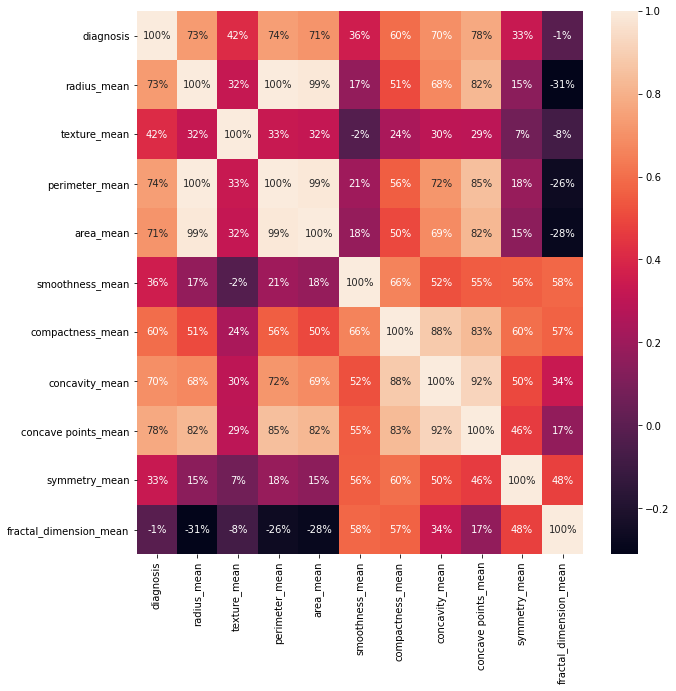

In [26]:
# Visualizamos el estado de correlación entre las características
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:, 1:12].corr(), annot=True, fmt='.0%')

Con el mapa de calor que hemos creado podemos observar que existen algunas características con un alto índice de correlación con el diagnóstico. Las features con mejor correlación son:

- Radius_mean
- Perimeter_mean
- Concave_points_mean


### Preparación de los datos para crear los modelos

In [28]:
# División de los datos del dataset en características (X), y etiquetas (Y)

X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values


In [29]:
# División del dataset e 75% para entrenamiento y 25% para el test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [31]:
# Transfomamos los datos para que todas la características esten en el mismo nivel de escala

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modelos

In [32]:
# creamos la función para definir los modelos

def modelos(X_train, Y_train):
    
    #Regresión logística
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Arboles de decisión
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Bosques aleatorios
    
    from sklearn.ensemble import RandomForestClassifier
    forest =  RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    # Determinamos la precisión (accuracy) de los modelos para los datos de entrenamiento
    
    print('[0]Precisión entrenamiento regresión logística:', log.score(X_train, Y_train))
    print('[1]Precisión entrenamiento arboles de decisión:', tree.score(X_train, Y_train))
    print('[2]Precisión entrenamiento bosques aleatorios:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [33]:
# Obtención de los modelos

modelo = modelos(X_train, Y_train)

[0]Precisión entrenamiento regresión logística: 0.9906103286384976
[1]Precisión entrenamiento arboles de decisión: 1.0
[2]Precisión entrenamiento bosques aleatorios: 0.9953051643192489


**Según los modelos realizados podemos determinar que el que mejor se ajusta en precisión a los datos de entrenamiento es el modelo de arboles de decisión**

In [36]:
# Se procede a probar la precisión de los datos de la partición de test mediante una matriz de confusión

from sklearn.metrics import confusion_matrix

for i in range( len(modelo) ):
    print('Modelo ', i)
    cm = confusion_matrix(Y_test, modelo[i].predict(X_test))

    VP = cm[0][0]
    VN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Precisión del test =', (VP + VN) / (VP + VN + FN + FP))
    print()

Modelo  0
[[86  4]
 [ 3 50]]
Precisión del test = 0.951048951048951

Modelo  1
[[83  7]
 [ 2 51]]
Precisión del test = 0.9370629370629371

Modelo  2
[[87  3]
 [ 2 51]]
Precisión del test = 0.965034965034965



Para el modelo de regresión logística obtenemos los siguientes parámetros:

- Verdaderos positivos = 86
- Verdaderos negativos = 50
- Falsos positivos = 4
- Falsos negativos = 3

- Accuracy test = 0,951

Los demás modelos funcionan de igual forma.

**El modelos con el que conseguimos mayor precisión a la hora de realizar el test es el modelo de arboles aleatorios con un accuracy de 0,965%**

In [39]:
# Otra forma automática de conseguir las métricas de los modelos:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(modelo) ):
    print('Modelo ', i)

    print(classification_report(Y_test, modelo[i].predict(X_test)))
    print(accuracy_score(Y_test, modelo[i].predict(X_test)))
    print()

Modelo  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Modelo  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Modelo  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weigh

In [40]:
# Mostrar la predición del modelo de bosques aleatorios

pred = modelo[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


Al comparar la predicción del modelo con los datos reales del test, podemos observar que existen algunos casos donde se ha realizado de forma erronea la predicción.

Podemos afirmar que el modelo no es perfecto.

Con el objetivo de poder mejorar el modelo se pueden modificar algunos parámetros, o bien implementar nuevos modelos diferentes de deep learning.

Se debe tener en cuenta que una accuracy del 96,5% está bien, peró es muy importante conseguir mayor precisión, teneindo en cuenta que estamos hablando de vidas humanas, ya no a nivel de fisiología, sinó también a nivel psicológico.